In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
#read csv file into data frame
df = pd.read_csv('metro_year_over_year_change_2020_with_covid.csv', index_col = 0)
#take the log of the quarterly per capita infection rate
df['log_rate'] = np.log10(df['new_cases_per_capita_1000'])
#create dataframes for each quarter
q1 = df[(df.Quarter == 1)]
q2 = df[(df.Quarter == 2)]
q3 = df[(df.Quarter == 3)]
q4 = df[(df.Quarter == 4)]
df.describe()

,Place ID,Year,Quarter,HPI,YoY change,% YoY change,year dec. quarter,total_covid_cases,population,new_cases,total_covid_per_capita_1000,new_cases_per_capita_1000,log_rate
count,1614.000000,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1.614000e+03,1614.000000,1614.000000,1614.000000,1614.000000
mean,29850.964064,2020.0,2.501859,236.476636,11.626233,5.207651,2020.375465,15331.721190,6.788420e+05,10146.849442,22.322683,15.512599,0.622752
std,11389.474445,0.0,1.117824,51.734597,5.495951,2.066175,0.279456,41565.415375,1.087483e+06,26339.703991,27.194357,18.725172,0.935585
min,10180.000000,2020.0,1.000000,140.250000,-29.750000,-6.724228,2020.000000,2.000000,2.263000e+04,2.000000,0.015362,0.015362,-1.813554
25%,20020.000000,2020.0,2.000000,197.207500,8.270000,3.951862,2020.250000,317.250000,1.479700e+05,289.250000,0.886802,0.795927,-0.099130
50%,29540.000000,2020.0,3.000000,225.510000,11.095000,5.153267,2020.500000,3077.000000,2.650660e+05,2467.500000,10.347992,7.361220,0.866949
75%,39880.000000,2020.0,3.750000,268.772500,14.630000,6.449355,2020.687500,12689.750000,6.973820e+05,8572.750000,34.657589,23.849215,1.377474
max,49740.000000,2020.0,4.000000,440.640000,41.500000,13.853128,2020.750000,770915.000000,1.003911e+07,500616.000000,142.854927,102.947677,2.012617


In [3]:
#define a function to add histograms to a scatter plot
def scatter_hist_log(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    

    # now determine limits :
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    xlim = (int(np.max(np.abs(x)))+1)*binwidth
    lim = (int(xymax/binwidth) + 1) * binwidth
    xbins = np.arange(0.01, 100, binwidth)
    

    bins = np.arange(-lim, lim + binwidth, binwidth)
    logbins = np.logspace(np.log10(xbins[0]),np.log10(xbins[-1]),len(bins))
    
    ax_histx.hist(x, bins=logbins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    

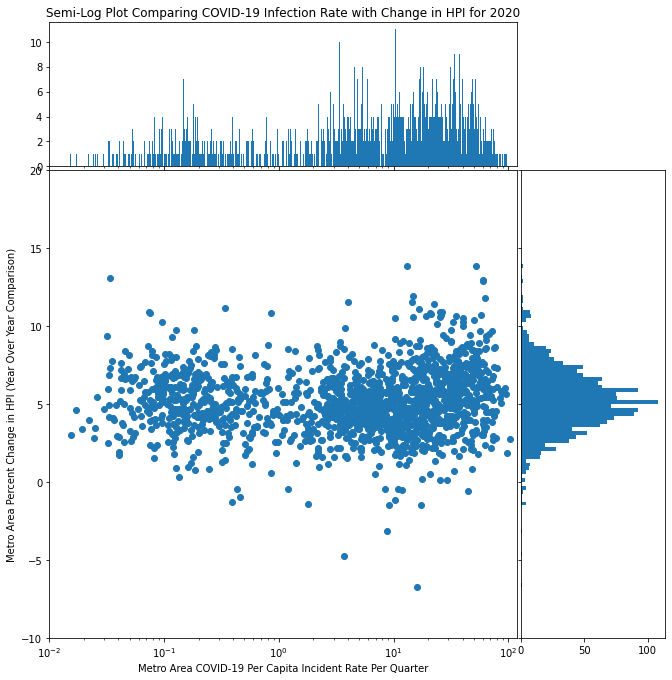

In [4]:
#define x y
x = df['new_cases_per_capita_1000']
y = df['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
ax_histx.set_title('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for 2020', )
ax.set_xlabel('Metro Area COVID-19 Per Capita Incident Rate Per Quarter')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)




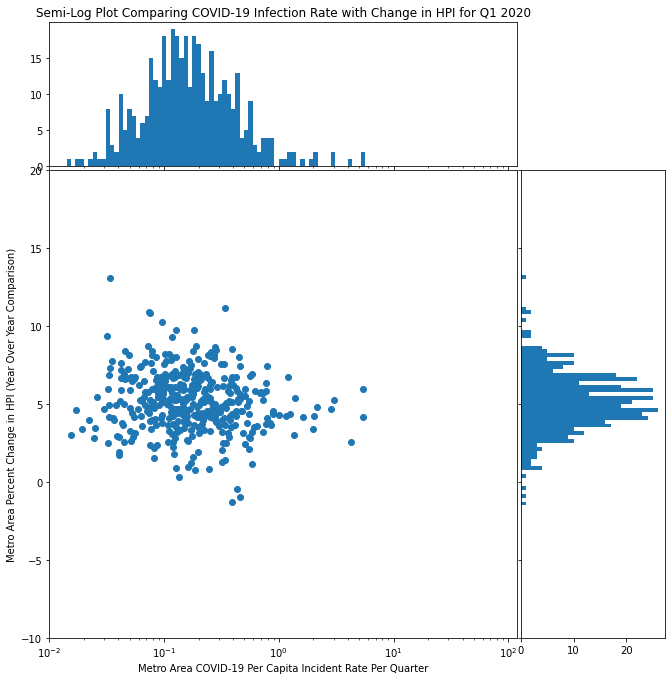

In [5]:
#define x y
x = q1['new_cases_per_capita_1000']
y = q1['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
ax_histx.set_title('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q1 2020')
ax.set_xlabel('Metro Area COVID-19 Per Capita Incident Rate Per Quarter')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)





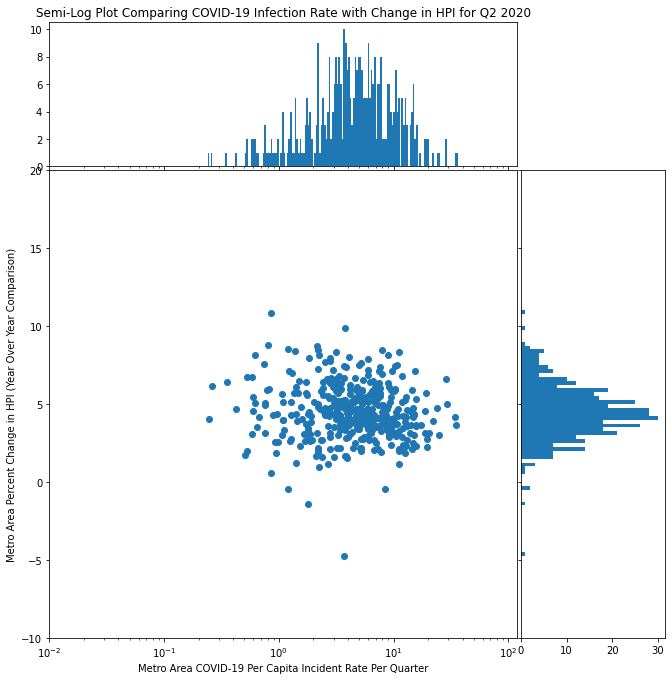

In [6]:
#define x y
x = q2['new_cases_per_capita_1000']
y = q2['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
ax_histx.set_title('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q2 2020')
ax.set_xlabel('Metro Area COVID-19 Per Capita Incident Rate Per Quarter')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)


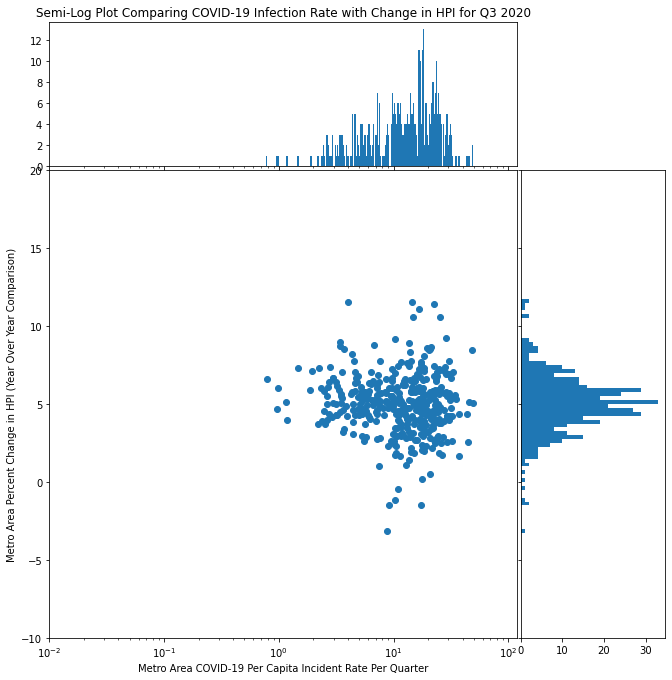

In [7]:
#define x y
x = q3['new_cases_per_capita_1000']
y = q3['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
ax_histx.set_title('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q3 2020')
ax.set_xlabel('Metro Area COVID-19 Per Capita Incident Rate Per Quarter')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)

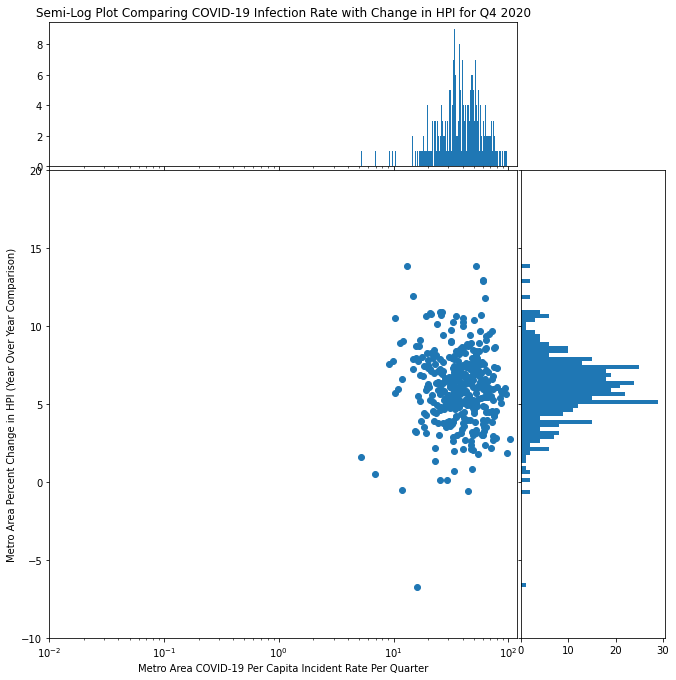

In [8]:
#define x y
x = q4['new_cases_per_capita_1000']
y = q4['% YoY change']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter, alpha = 0.5)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xscale('log')
ax.set_xlim([.01, 120])
ax.set_ylim([-10, 20])
ax_histx.set_title('Semi-Log Plot Comparing COVID-19 Infection Rate with Change in HPI for Q4 2020')
ax.set_xlabel('Metro Area COVID-19 Per Capita Incident Rate Per Quarter')
ax.set_ylabel('Metro Area Percent Change in HPI (Year Over Year Comparison)')
# use the previously defined function
scatter_hist_log(x, y, ax, ax_histx, ax_histy)

<Figure size 432x288 with 0 Axes>

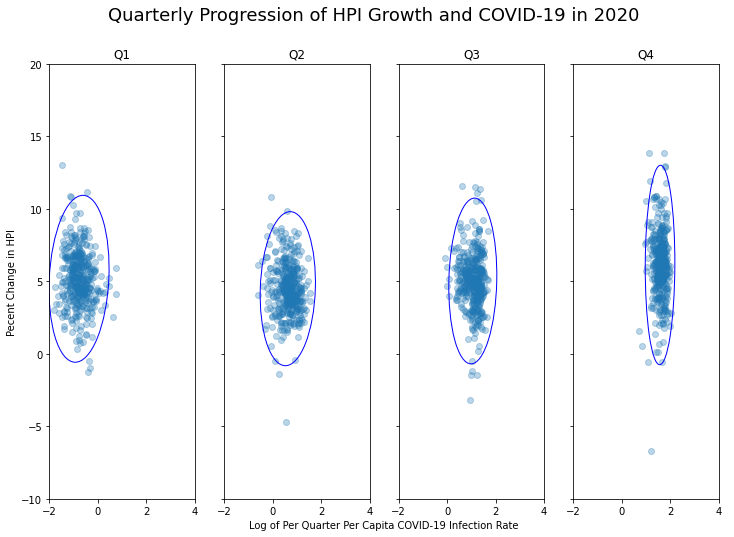

In [13]:
#set x & y for each quarter
x1 = q1['log_rate']
y1 = q1['% YoY change']
x2 = q2['log_rate']
y2 = q2['% YoY change']
x3 = q3['log_rate']
y3 = q3['% YoY change']
x4 = q4['log_rate']
y4 = q4['% YoY change']
#instantiate the figure, set its size
fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
#make big subplot for labeling
ax = fig.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

#Make sub plot for Q1
ax1 = fig.add_subplot(141)
cov = np.cov(x1, y1)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x1), np.mean(y1)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax1.add_artist(ell)
ax1.scatter(x1, y1, alpha =0.3)
ax1.set_xlim([-2, 4])
ax1.set_ylim([-10, 20])
ax1.set_title('Q1')
ax1.set_ylabel('Pecent Change in HPI')
#make sub plot for Q2
ax2 = fig.add_subplot(142, sharey=ax1)
cov = np.cov(x2, y2)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x2), np.mean(y2)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax2.add_artist(ell)
ax2.scatter(x2, y2, alpha =0.3)
ax2.set_xlim([-2, 4])
ax2.set_title('Q2')

#make sub plot for Q3
ax3 = fig.add_subplot(143, sharey=ax1)
cov = np.cov(x3, y3)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x3), np.mean(y3)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax3.add_artist(ell)
ax3.scatter(x3, y3, alpha =0.3)
ax3.set_xlim([-2, 4])
ax3.set_title('Q3')

#make sub plot for Q4
ax4 = fig.add_subplot(144, sharey=ax1)
cov = np.cov(x4, y4)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x4), np.mean(y4)),
        width=lambda_[0]*3*2, height=lambda_[1]*3*2,
        angle=np.rad2deg(np.arccos(v[0, 0])),edgecolor = 'blue' )
ell.set_facecolor('none')
ax4.add_artist(ell)
ax4.scatter(x4, y4, alpha =0.3)
ax4.set_xlim([-2, 4])
ax4.set_title('Q4')

ax.set_xlabel('Log of Per Quarter Per Capita COVID-19 Infection Rate')
fig.suptitle('Quarterly Progression of HPI Growth and COVID-19 in 2020', fontsize = 18)

#hide un-needed y axis numbers
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.show()

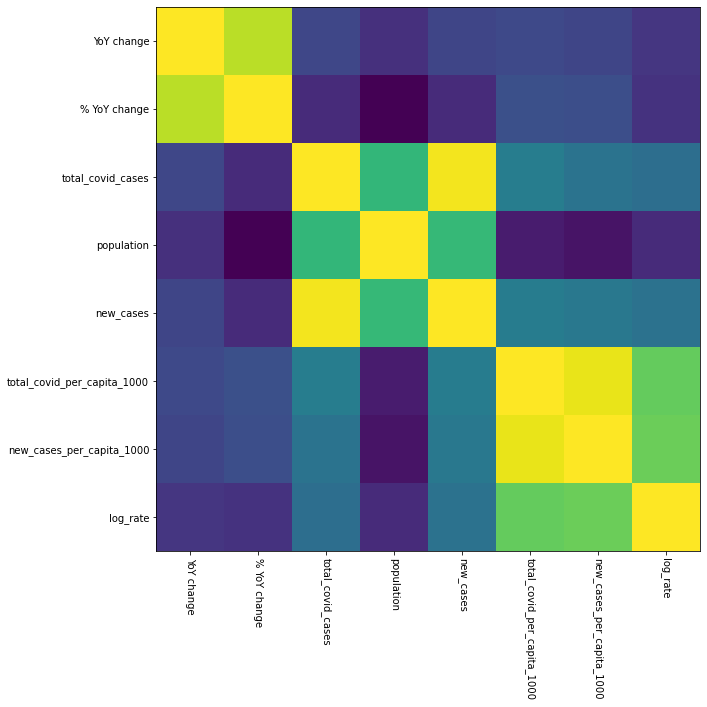

In [14]:
df_s = df[['YoY change', '% YoY change', 'total_covid_cases', \
           'population', 'new_cases', 'total_covid_per_capita_1000', \
          'new_cases_per_capita_1000', 'log_rate']]
cols =list(df_s.columns)
corr = df_s.corr()
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(cols)),cols,rotation=-90)
plt.yticks(range(len(cols)), cols)
plt.imshow(corr, cmap = 'viridis', interpolation = 'nearest'  )